## Medical Insurance Costs

In [38]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
os.listdir('/Users/dike/Documents/Codecademy/portfolio/python-portfolio-project-starter-files')



['.DS_Store',
 'us-medical-insurance-costs.ipynb',
 'insurance.csv',
 '.ipynb_checkpoints']

In [9]:
df = pd.read_csv('/Users/dike/Documents/Codecademy/portfolio/python-portfolio-project-starter-files/insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
#segregating by sex
male = df[df.sex=='male']
female = df[df.sex=='female']

In [17]:
male_bmi = male.bmi.mean()
male_bmi

30.943128698224854

In [19]:
female_bmi = female.bmi.mean()
female_bmi
#not much of a difference between the two.

30.37774924471299

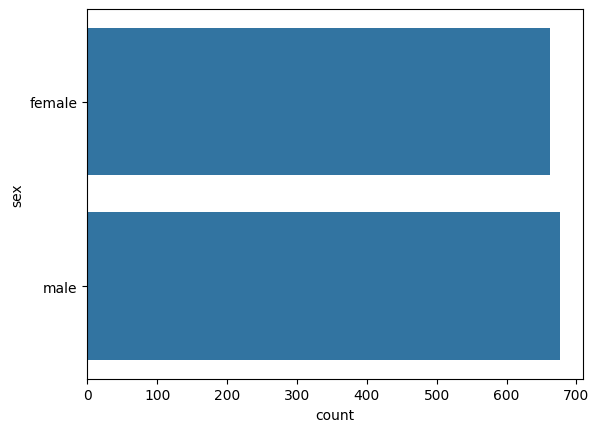

In [30]:
sns.countplot(df.sex)
plt.show()#all equal representation

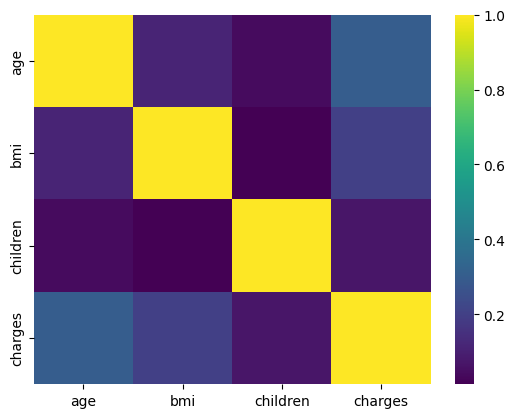

In [35]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),cmap='viridis')
plt.show()#no correlation detected

In [41]:
smoke_chil_freq = pd.crosstab(df.smoker,df.children)
smoke_chil_freq

children,0,1,2,3,4,5
smoker,,,,,,
no,459,263,185,118,22,17
yes,115,61,55,39,3,1


In [44]:
#checking for association between smoker status and children.
chi2,p,_,expected = chi2_contingency(smoke_chil_freq)
print(chi2)

6.887719904947631


In [45]:
print(expected)

[[456.45440957 257.65022422 190.85201794 124.8490284   19.88041854
   14.31390135]
 [117.54559043  66.34977578  49.14798206  32.1509716    5.11958146
    3.68609865]]


In [47]:
print(p)

0.22912555089568779


Since the p-value isnt below 0.05 and chi2 isnt large there no reason to believe that there is an association between smoker-status and number of children.